<img src="https://tse3.mm.bing.net/th?id=OIP.kSzGyACQvs4NbxatdqNraQHaE8&pid=Api&P=0&h=180" alt="Alt text" style="width: 400px;"/>


<font color='Black'>**Importing the libraries**</font>

In [1]:
#importing all the libraries we are gonna use for this project
import numpy as np
import pandas as pd
import warnings
from numpy import asarray
from PIL import Image
import cv2
import glob
import os 
import random
import subprocess
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.patches import Rectangle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
warnings.filterwarnings("ignore")

<font color='Black'>**Function to check if image is readable or not**</font>

In [2]:
# This function check if image can be read or not 
# It return T if readable else F
# Its necessary as while training model we cant have unreadable images
def is_image_readable(file_path):
    try:
        with Image.open(file_path) as img:
            img.verify()
        return True
    except (IOError, SyntaxError) as e:
        return False

In [3]:
# Function defined to ease process of loading all 5 classes using this , rather than writing this whole thing for all 5
def load_image_list(directory):
    image_list = []
    for filename in os.listdir(directory):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            image_list.append(os.path.join(directory, filename))
            print(os.path.join(directory, filename))
    return image_list

directories = [
    "Revitsone-5classes/Revitsone-5classes/other_activities",
    "Revitsone-5classes/Revitsone-5classes/safe_driving",
    "Revitsone-5classes/Revitsone-5classes/talking_phone",
    "Revitsone-5classes/Revitsone-5classes/texting_phone",
    "Revitsone-5classes/Revitsone-5classes/turning"
]

In [4]:
# loading images for each class/folder
image_list_other = load_image_list(directories[0])
image_list_safe = load_image_list(directories[1])
image_list_talking = load_image_list(directories[2])
image_list_text = load_image_list(directories[3])
image_list_turn = load_image_list(directories[4])

Revitsone-5classes/Revitsone-5classes/other_activities\2019-04-2416-05-13.png
Revitsone-5classes/Revitsone-5classes/other_activities\2019-04-2416-06-20.png
Revitsone-5classes/Revitsone-5classes/other_activities\2019-04-2416-06-37.png
Revitsone-5classes/Revitsone-5classes/other_activities\2019-04-2416-06-59.png
Revitsone-5classes/Revitsone-5classes/other_activities\2019-04-2416-07-58.png
Revitsone-5classes/Revitsone-5classes/other_activities\2019-04-2416-08-09.png
Revitsone-5classes/Revitsone-5classes/other_activities\2019-04-2416-08-22.png
Revitsone-5classes/Revitsone-5classes/other_activities\2019-04-2416-08-44.png
Revitsone-5classes/Revitsone-5classes/other_activities\2019-04-2416-33-00.png
Revitsone-5classes/Revitsone-5classes/other_activities\2019-04-2416-33-09.png
Revitsone-5classes/Revitsone-5classes/other_activities\2019-04-2416-33-19.png
Revitsone-5classes/Revitsone-5classes/other_activities\2019-04-2416-33-23.png
Revitsone-5classes/Revitsone-5classes/other_activities\2019-04-2

In [5]:
# Function to ease process of removing unreadabe images from each 5 class of images
def remove_unreadable(image_list):
    for i in image_list:
        if is_image_readable(i):
            continue
        else:
            print(f"The image file '{i}' is not readable.")
            image_list.remove(i)

In [6]:
# removing unreadable images from each class
remove_unreadable(image_list_other)
remove_unreadable(image_list_safe)
remove_unreadable(image_list_talking)
remove_unreadable(image_list_text)
remove_unreadable(image_list_turn)

The image file 'Revitsone-5classes/Revitsone-5classes/other_activities\img_13318.jpg' is not readable.
The image file 'Revitsone-5classes/Revitsone-5classes/other_activities\img_13396.jpg' is not readable.
The image file 'Revitsone-5classes/Revitsone-5classes/other_activities\img_13541.jpg' is not readable.
The image file 'Revitsone-5classes/Revitsone-5classes/other_activities\img_13625.jpg' is not readable.
The image file 'Revitsone-5classes/Revitsone-5classes/other_activities\img_20398.jpg' is not readable.
The image file 'Revitsone-5classes/Revitsone-5classes/other_activities\img_22266.jpg' is not readable.
The image file 'Revitsone-5classes/Revitsone-5classes/other_activities\img_4664.jpg' is not readable.
The image file 'Revitsone-5classes/Revitsone-5classes/other_activities\img_79.jpg' is not readable.
The image file 'Revitsone-5classes/Revitsone-5classes/other_activities\img_7973.jpg' is not readable.
The image file 'Revitsone-5classes/Revitsone-5classes/turning\img_101434.jpg' 

<font color='Black'>**Showing all 5 classes and what they depict for better understanding**</font>

In [7]:
# Setting stylings for matplotlib we gonna use later
font = {'fontsize': 25}
background_color = 'blue'

In [8]:
# creating name for each classes pictures label
situation = [
    "Random Images of People Doing other activities while Driving",
    "Random Images of People Driving Safe",
    "Random Images of People Talking on the Phone while Driving",
    "Random Images of People Texting while Driving",
    "Random Images of People Turning while Driving"
]

In [9]:
# function to print 4 random image from any particular class
def demo(image_list,index):
    plt.figure(figsize=(15,9))
    plt.suptitle(situation[index], fontdict=font, fontsize=25, backgroundcolor=background_color)
    plt.axis('off') 
    for i in range(4):
        random_img = random.choice(image_list)
        imgs = imread(random_img)
        plt.subplot(2, 2, i + 1)
        plt.imshow(imgs)
    plt.show()

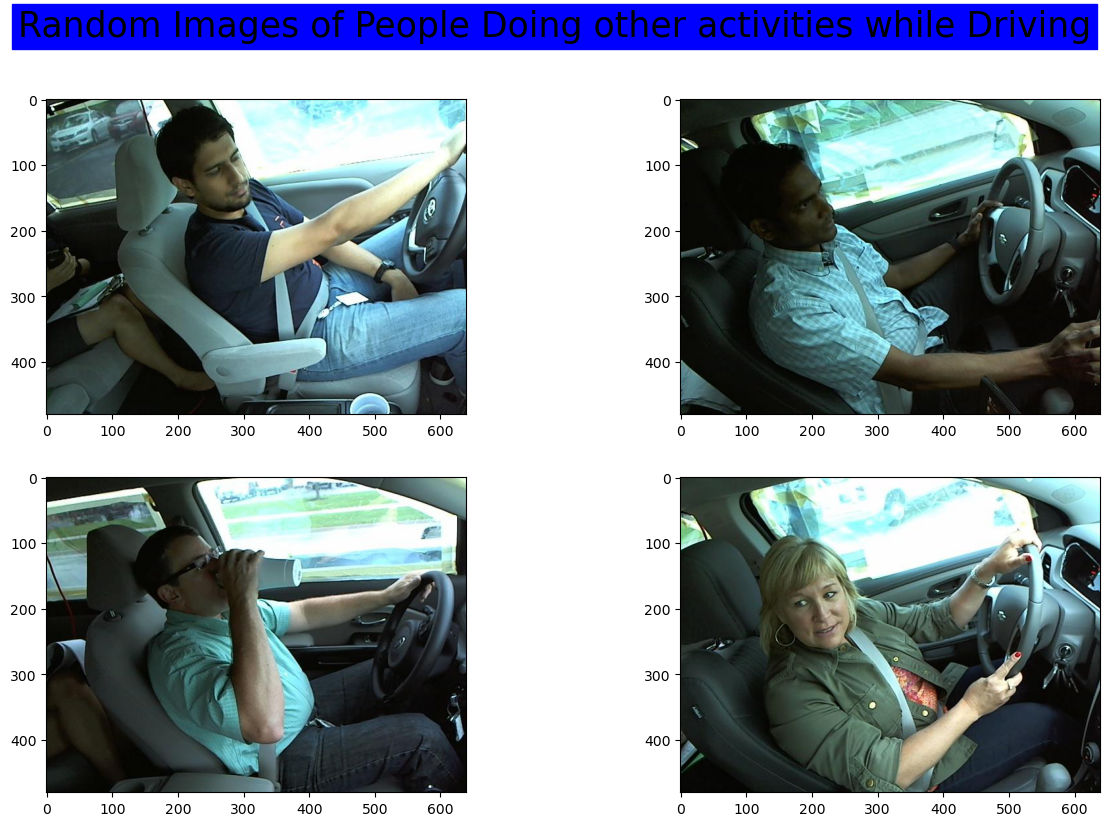

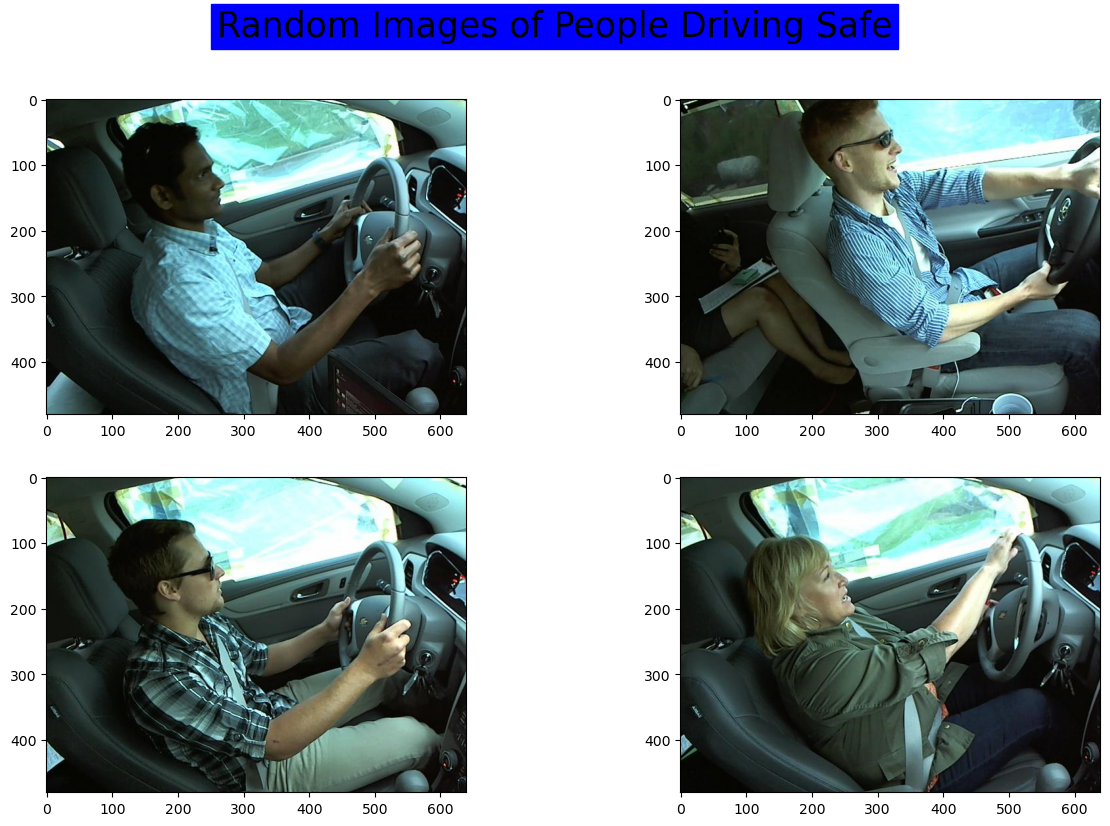

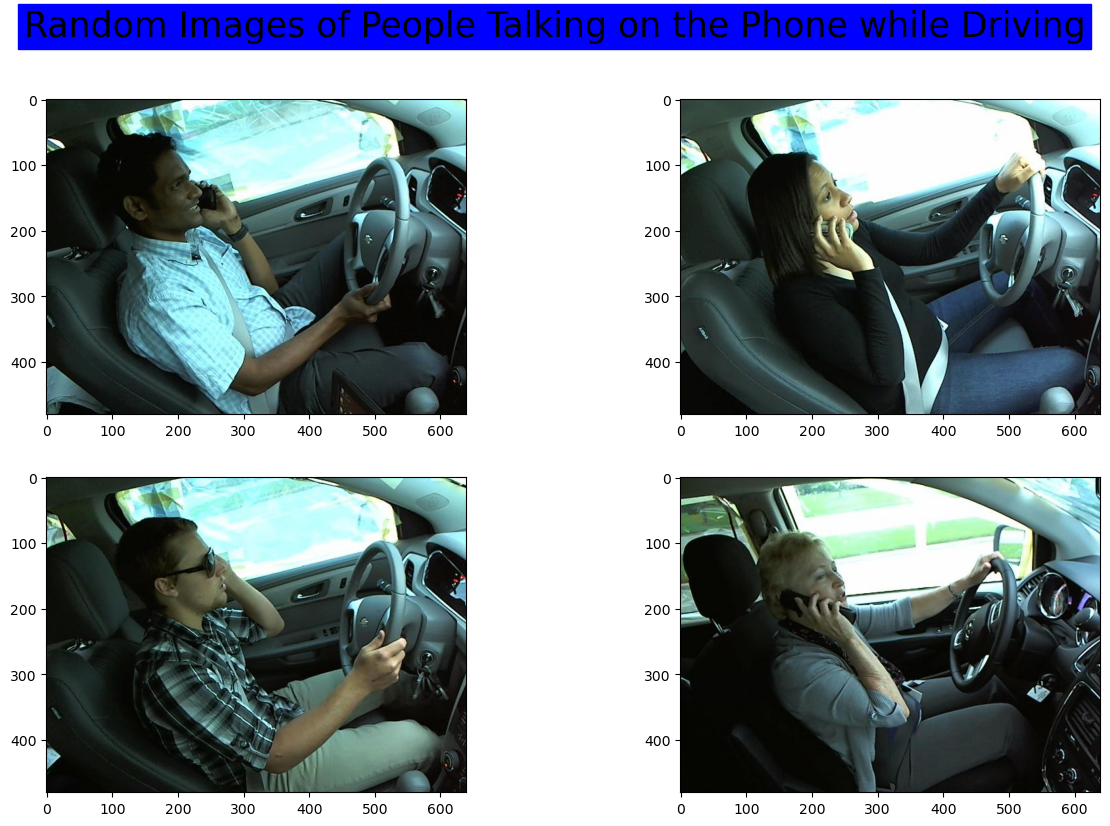

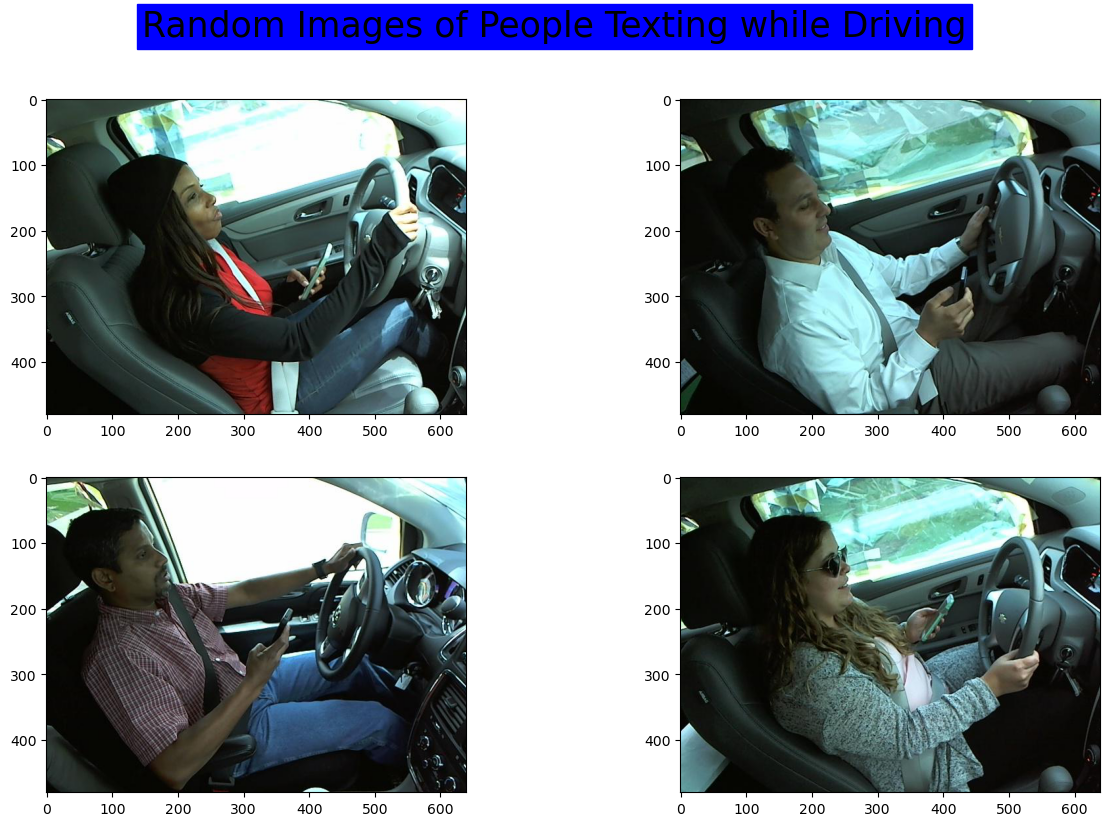

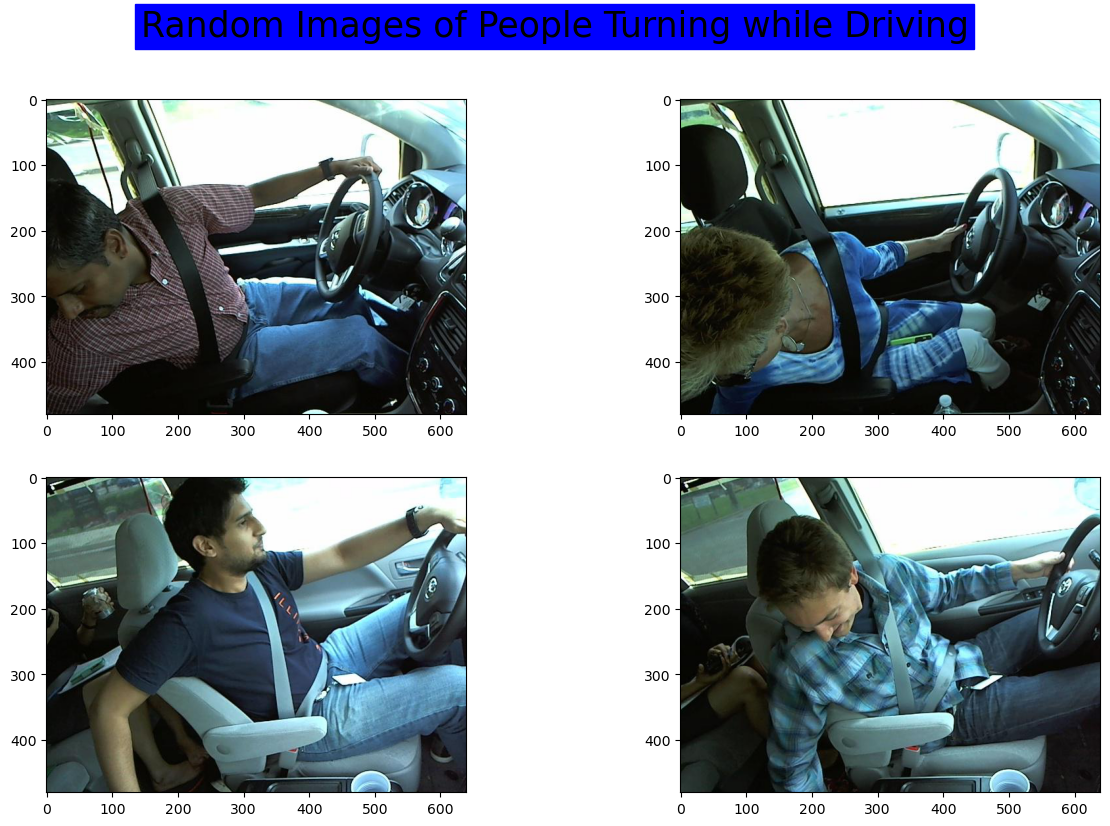

In [10]:
# Displaying all 5 classes demo to get better idea of what we working with
demo(image_list_other,0)
demo(image_list_safe,1)
demo(image_list_talking,2)
demo(image_list_text,3)
demo(image_list_turn,4)

<font color='Black'>**Preparing data and splitting for training ,testing and validation**</font>

In [11]:
# checking number of images in each class
print("Number of images of Driver Talking on the Phone   = " ,len(image_list_talking))
print("Number of images of Driver doing other activities = " ,len(image_list_other))
print("Number of images of Driver Turning while driving  = " ,len(image_list_turn))
print("Number of images of Driver driving safe           = " ,len(image_list_safe))
print("Number of images of Driver Texting                = " ,len(image_list_text))

Number of images of Driver Talking on the Phone   =  2163
Number of images of Driver doing other activities =  2118
Number of images of Driver Turning while driving  =  2039
Number of images of Driver driving safe           =  2184
Number of images of Driver Texting                =  2174


In [12]:
# splitting the images for test train and validation
train_other = image_list_other[:1600]
test_other = image_list_other[1600:2000]
valid_other = image_list_other[2000:]

train_safe = image_list_safe[:1600]
test_safe = image_list_safe[1600:2000]
valid_safe = image_list_safe[2000:]

train_talking = image_list_talking[:1600]
test_talking = image_list_talking[1600:2000]
valid_talking = image_list_talking[2000:]

train_text = image_list_text[:1600]
test_text = image_list_text[1600:2000]
valid_text = image_list_text[2000:]

train_turn = image_list_turn[:1500]
test_turn = image_list_turn[1500:1900]
valid_turn = image_list_turn[1900:]

In [13]:
#checking size of each class test,train and validation set
print("Train","Valid", "Test")
print (len(train_safe), len(valid_safe), len(test_safe))
print (len(train_other), len(valid_other), len(test_other))
print (len(train_talking), len(valid_talking), len(test_talking))
print (len(train_text), len(valid_text), len(test_text))
print (len(train_turn), len(valid_turn), len(test_turn))

Train Valid Test
1600 184 400
1600 118 400
1600 163 400
1600 174 400
1500 139 400


In [14]:
# converting each class of images to Dataframe where image col represent image and label represent the class
train_other_df = pd.DataFrame({'image':train_other, 'label':'Other'})
train_safe_df = pd.DataFrame({'image':train_safe, 'label':'Safe'})
train_talking_df = pd.DataFrame({'image':train_talking, 'label':'Talk'})
train_text_df = pd.DataFrame({'image':train_text, 'label':'Text'})
train_turn_df = pd.DataFrame({'image':train_turn, 'label':'Turn'})

test_other_df = pd.DataFrame({'image':test_other, 'label':'Other'})
test_safe_df = pd.DataFrame({'image':test_safe, 'label':'Safe'})
test_talking_df = pd.DataFrame({'image':test_talking, 'label':'Talk'})
test_text_df = pd.DataFrame({'image':test_text, 'label':'Text'})
test_turn_df = pd.DataFrame({'image':test_turn, 'label':'Turn'})

valid_other_df = pd.DataFrame({'image':valid_other, 'label':'Other'})
valid_safe_df = pd.DataFrame({'image':valid_safe, 'label':'Safe'})
valid_talking_df = pd.DataFrame({'image':valid_talking, 'label':'Talk'})
valid_text_df = pd.DataFrame({'image':valid_text, 'label':'Text'})
valid_turn_df = pd.DataFrame({'image':valid_turn, 'label':'Turn'})

# concatinating all 5 classes to one for each test,train and validation

train_df = pd.concat([train_other_df, train_safe_df, train_talking_df, train_text_df, train_turn_df])
val_df = pd.concat([valid_other_df, valid_safe_df, valid_talking_df, valid_text_df, valid_turn_df])
test_df = pd.concat([test_other_df, test_safe_df, test_talking_df, test_text_df, test_turn_df])

In [15]:
# getting an overview
train_df.head()

image  label
0  Revitsone-5classes/Revitsone-5classes/other_ac...  Other
1  Revitsone-5classes/Revitsone-5classes/other_ac...  Other
2  Revitsone-5classes/Revitsone-5classes/other_ac...  Other
3  Revitsone-5classes/Revitsone-5classes/other_ac...  Other
4  Revitsone-5classes/Revitsone-5classes/other_ac...  Other

In [16]:
# checking size of each test ,train and validation dataset
print("Number of images in train dataframe is: ", len(train_df))
print("Number of images in val dataframe is  : ", len(val_df))
print("Number of images in test dataframe is : ", len(test_df))

Number of images in train dataframe is:  7900
Number of images in val dataframe is  :  778
Number of images in test dataframe is :  2000


<font color='Black'>**Hyperparameters should be considered before the model training . We set Batch size as 64.   Note: for AlexNet and ResNet height and width as a 240*240 format is generally recommended.**</font>

In [17]:
batch_size = 64
height = 240
width = 240

<font color='Black'>**Rescaling the images in same shape for input layer of model**</font>

In [18]:
train= ImageDataGenerator(rescale=1./250.)
test= ImageDataGenerator(rescale=1./250.)
val= ImageDataGenerator(rescale=1./250.)

In [19]:
# We use a famous python library to convert each of test , train , val dataframes to "model input" acceptable format
# I have used shuffle so to create randomness so that same class doesnt come together while training
train=train.flow_from_dataframe(
  dataframe=train_df,
  x_col="image",
  y_col="label",
  class_mode="categorical",
  batch_size=batch_size,
  seed=42,
  shuffle=True,
  target_size=(height,width)
)

val=val.flow_from_dataframe(
  dataframe=val_df,
  x_col="image",
  y_col="label",
  class_mode="categorical",
  batch_size=batch_size,
  seed=42,
  shuffle=True,
  target_size=(height,width)
)

test=test.flow_from_dataframe(
  dataframe=test_df,
  x_col="image",
  y_col="label",
  class_mode="categorical",
  batch_size=batch_size,
  seed=42,
  shuffle=True,
  target_size=(height,width)
)

Found 7900 validated image filenames belonging to 5 classes.
Found 778 validated image filenames belonging to 5 classes.
Found 2000 validated image filenames belonging to 5 classes.


<font color='Black'>**1st : Our Own Model**</font>

In [20]:
# defining the layers of model and parameters
model=keras.Sequential([
    keras.layers.Conv2D(100,3,input_shape=(240,240,3),padding='valid',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(50,3,padding='valid',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(25,3,padding='valid',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(5,activation='softmax'),
])

# compiling the model with the mentioned parameters

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# fitting training data and setting epochs to 10 as we can go high epoch but its taking so much time
# AFter several dry runs we found 10 is good 

Our_model=model.fit(train,epochs=10)




Epoch 1/10


124/124 [==============================] - 877s 7s/step - loss: 0.9968 - accuracy: 0.5990
Epoch 2/10
124/124 [==============================] - 867s 7s/step - loss: 0.2077 - accuracy: 0.9385
Epoch 3/10
124/124 [==============================] - 818s 7s/step - loss: 0.0838 - accuracy: 0.9730
Epoch 4/10
124/124 [==============================] - 811s 7s/step - loss: 0.0378 - accuracy: 0.9894
Epoch 5/10
124/124 [==============================] - 831s 7s/step - loss: 0.0220 - accuracy: 0.9925
Epoch 6/10
124/124 [==============================] - 915s 7s/step - loss: 0.0332 - accuracy: 0.9891
Epoch 7/10
124/124 [==============================] - 892s 7s/step - loss: 0.0249 - accuracy: 0.9927
Epoch 8/10
124/124 [==============================] - 834s 7s/step - loss: 0.0124 - accuracy: 0.9965
Epoch 9/10
124/124 [==============================] - 929s 7s/step - loss: 0.0069 - accuracy: 0.9982
Epoch 10/10
124/124 [==============================] - 800s 6s/step - loss: 0.0093 - a

<font color='Black'>**Evaluating the 1st model**</font>

In [22]:
# evaluating on test data
model.evaluate(test)

32/32 [==============================] - 38s 1s/step - loss: 0.0832 - accuracy: 0.9800


[0.08322359621524811, 0.9800000190734863]

In [25]:
print(Our_model.history.keys())

dict_keys(['loss', 'accuracy'])


In [26]:
# storing history info so we can use to plot graph to see progess with epochs
training_loss_our = Our_model.history["loss"]
training_acc_our = Our_model.history['accuracy']

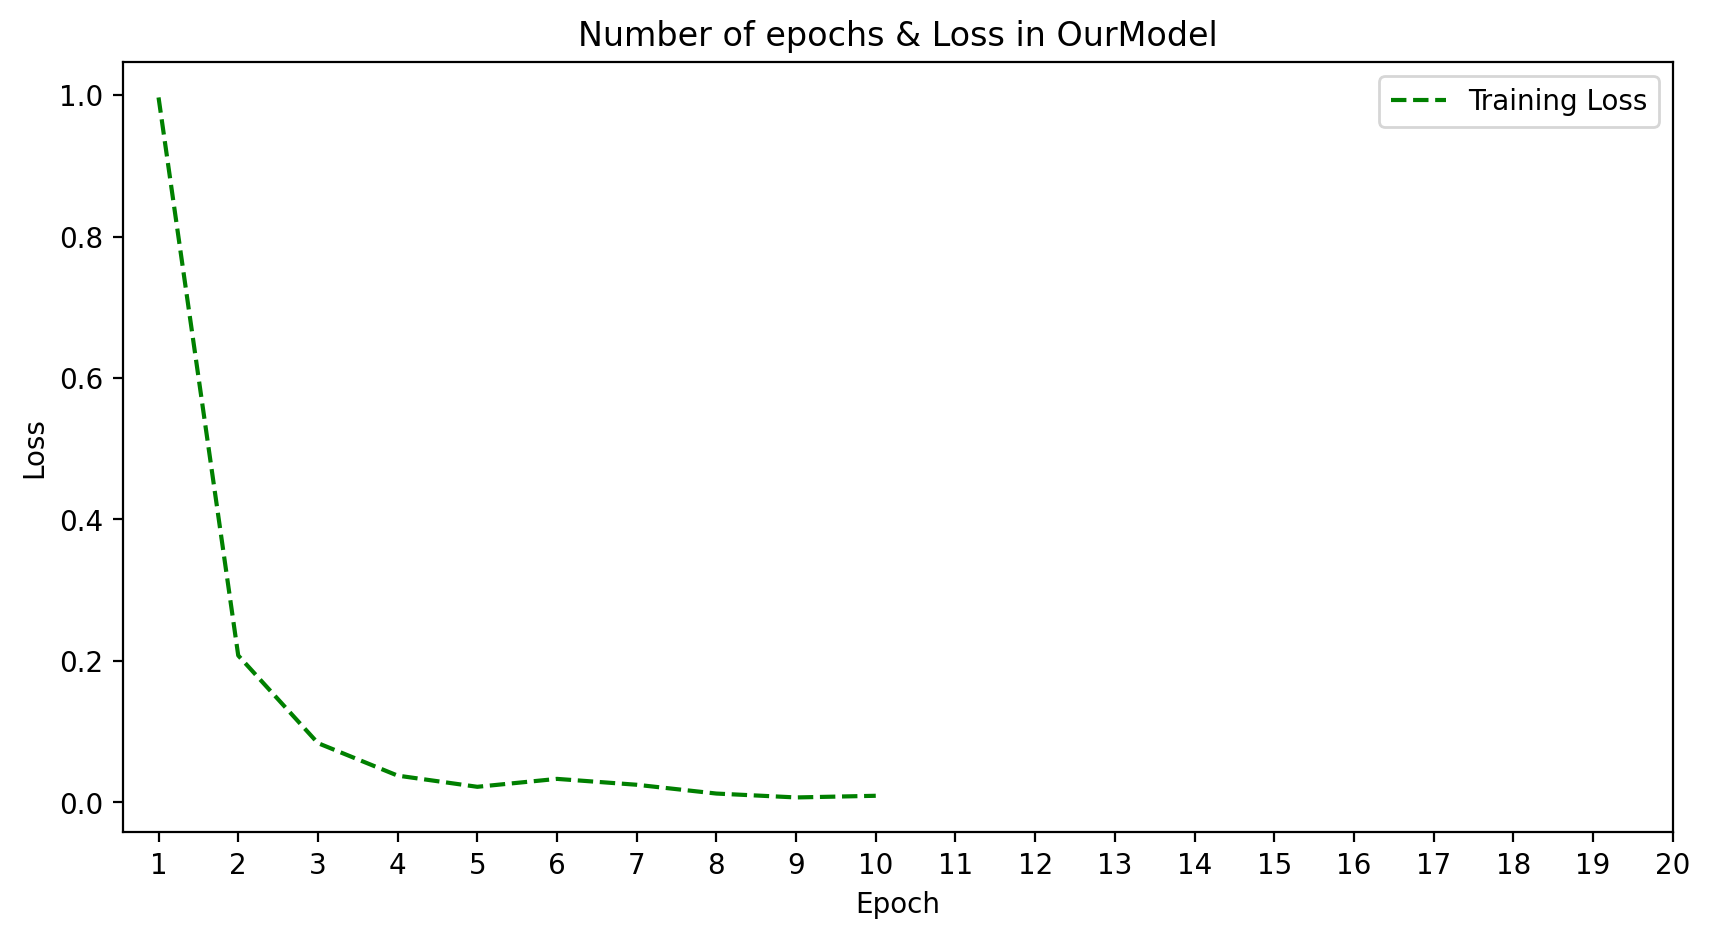

In [28]:
# Checking the Loss as epochs pass by from 0-10
epoch_count = range(1, len(training_loss_our) + 1)
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_our, 'r--', color= 'green')
plt.legend(['Training Loss'])
plt.title('Number of epochs & Loss in OurModel')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

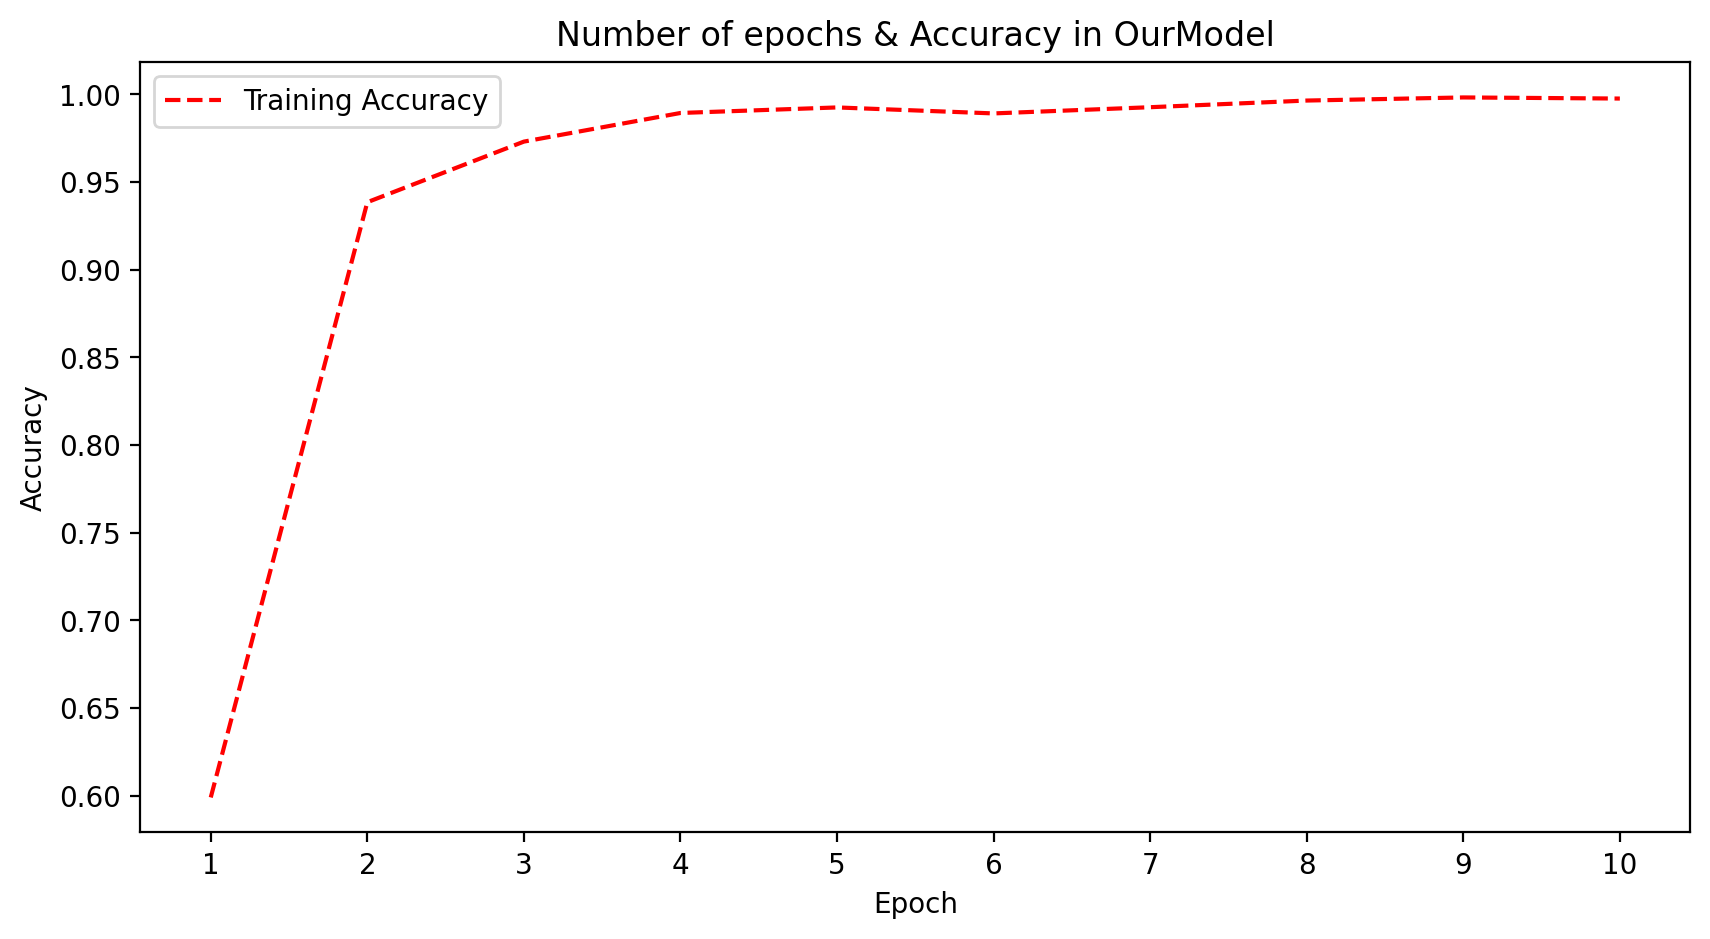

In [29]:
# checking progress of accuracy with respect to epochs
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_our, 'r--', color= 'red')
plt.legend(['Training Accuracy'])
plt.title('Number of epochs & Accuracy in OurModel')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

<font color='Black'>**2nd model : Alex_Net**</font>
  AlexNet is a seminal convolutional neural network architecture that gained prominence after winning the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2012. Developed by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton, it consists of eight layers: five convolutional layers followed by three fully connected layers. AlexNet introduced several innovations, including the extensive use of ReLU activations, overlapping pooling, and dropout regularization, significantly advancing the field of deep learning and paving the way for deeper and more complex neural network architectures.

In [30]:
# this is how Alex Net model structure looks like 
def AlexNet():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(256, 5, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)
    model_Alex = models.Model(inputs=inp, outputs=x)
    return model_Alex

In [31]:
model_Alex = AlexNet()
model_Alex.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 58, 58, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 28, 28, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 256)       1024  

In [33]:
# compiling and fitting training data
model_Alex.compile(loss=BinaryCrossentropy(),optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
Alex_model=model_Alex.fit(train, epochs=10,validation_data=val)

Epoch 1/10
124/124 [==============================] - 397s 3s/step - loss: 0.5089 - accuracy: 0.4429 - val_loss: 0.4680 - val_accuracy: 0.4229
Epoch 2/10
124/124 [==============================] - 423s 3s/step - loss: 0.2504 - accuracy: 0.7271 - val_loss: 0.2983 - val_accuracy: 0.6671
Epoch 3/10
124/124 [==============================] - 510s 4s/step - loss: 0.1484 - accuracy: 0.8582 - val_loss: 0.1222 - val_accuracy: 0.8830
Epoch 4/10
124/124 [==============================] - 484s 4s/step - loss: 0.1025 - accuracy: 0.9035 - val_loss: 0.0812 - val_accuracy: 0.9216
Epoch 5/10
124/124 [==============================] - 497s 4s/step - loss: 0.0781 - accuracy: 0.9280 - val_loss: 0.0759 - val_accuracy: 0.9306
Epoch 6/10
124/124 [==============================] - 465s 4s/step - loss: 0.0630 - accuracy: 0.9419 - val_loss: 0.0580 - val_accuracy: 0.9537
Epoch 7/10
124/124 [==============================] - 496s 4s/step - loss: 0.0578 - accuracy: 0.9503 - val_loss: 0.0596 - val_accuracy: 0.9447

<font color='Black'>**Evaluating AlexNet model**</font>

In [39]:
# evaluating model on test data
model_Alex.evaluate(test)

32/32 [==============================] - 33s 1s/step - loss: 0.0529 - accuracy: 0.9615


[0.05287589132785797, 0.9614999890327454]

In [34]:
training_loss_alex = Alex_model.history['loss']
training_acc_alex = Alex_model.history['accuracy']

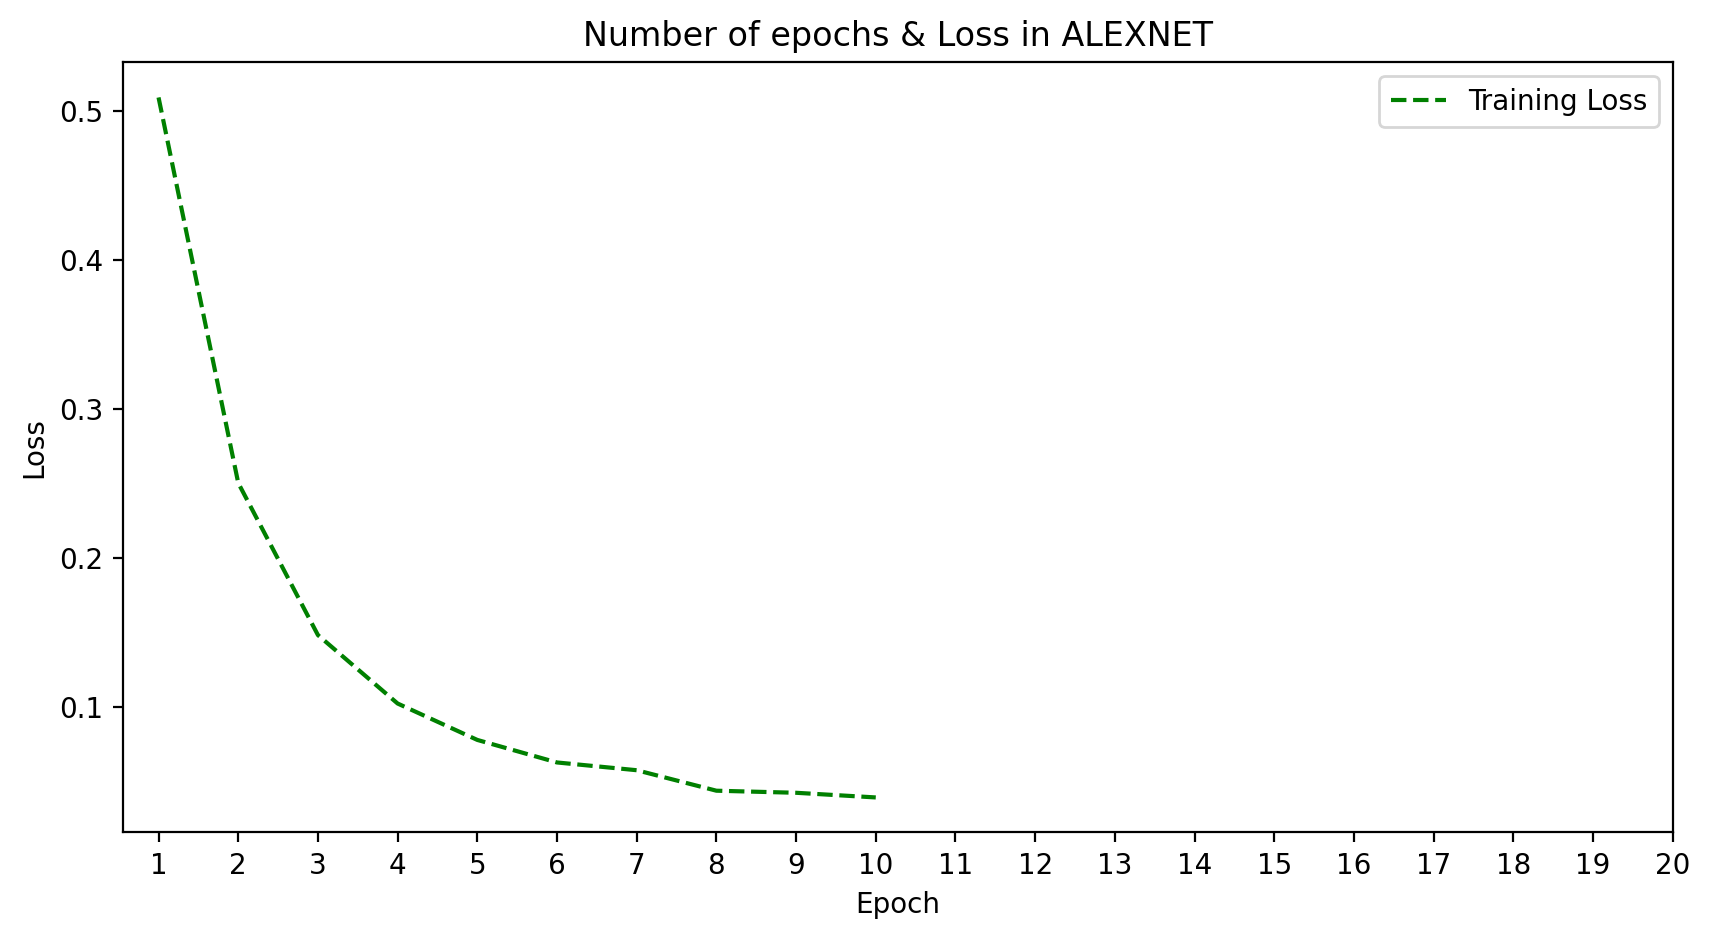

In [35]:
# Plotting loss vs number of epochs 
epoch_count = range(1, len(training_loss_alex) + 1)
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_alex, 'r--', color= 'green')
plt.legend(['Training Loss'])
plt.title('Number of epochs & Loss in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

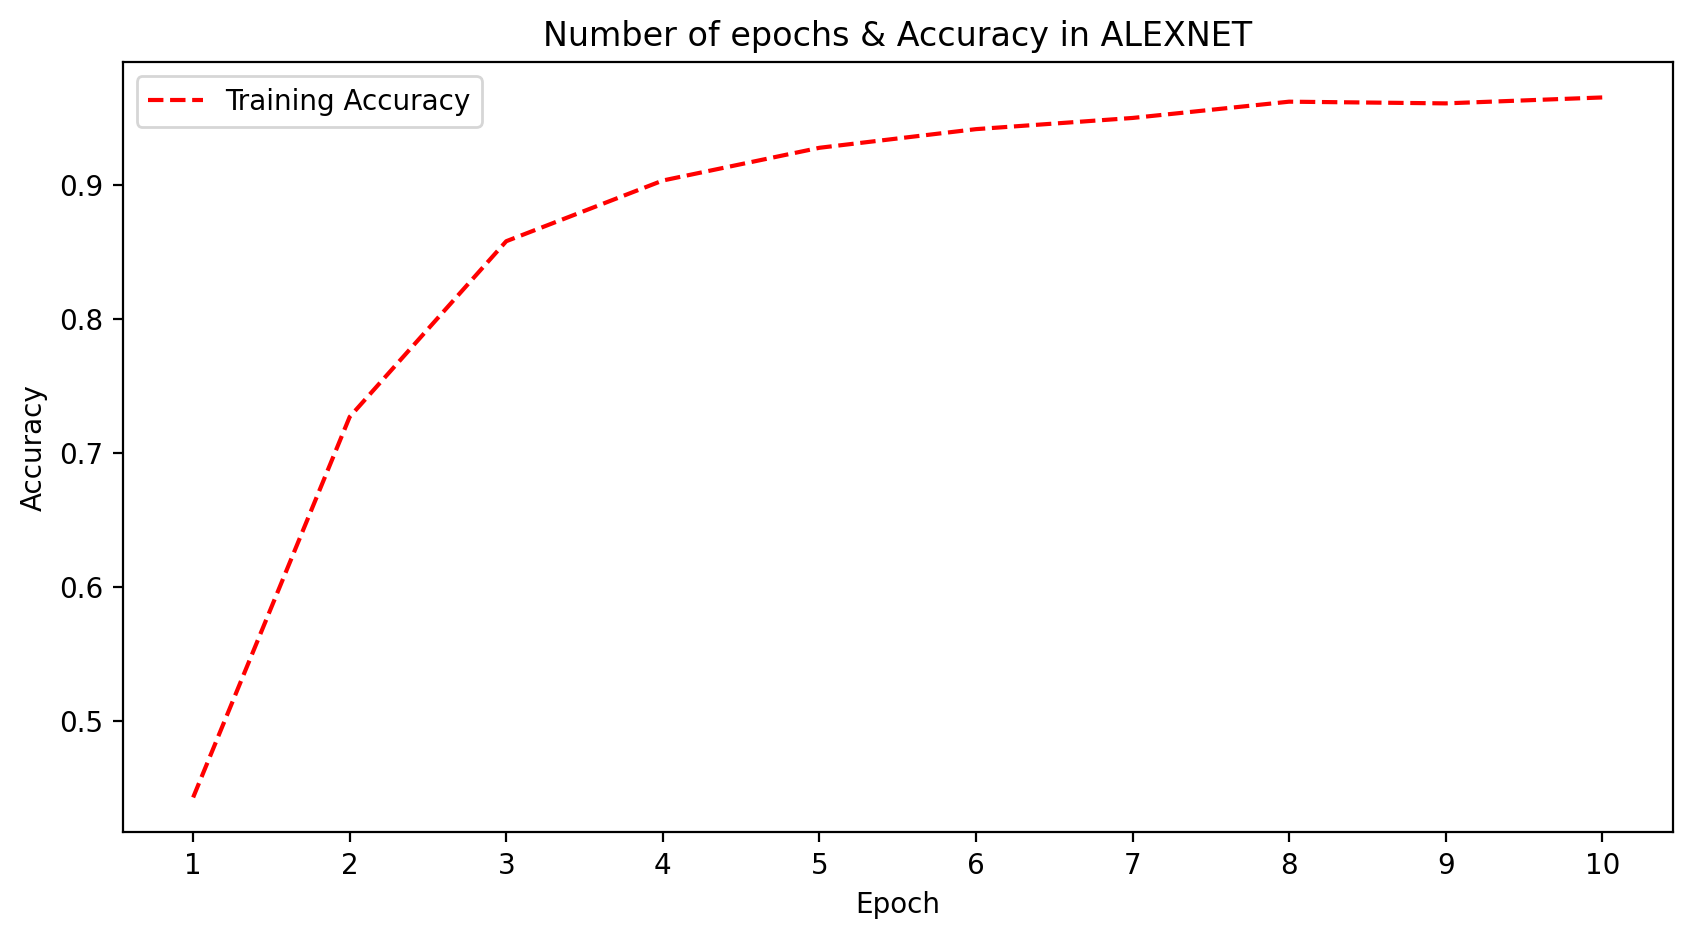

In [36]:
# Plotting accuracy vs number of epochs
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_alex, 'r--', color= 'red')
plt.legend(['Training Accuracy'])
plt.title('Number of epochs & Accuracy in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

<font color='Black'>**3rd model : Res_Net34**</font>
ResNet-34 is a variant of the Residual Network (ResNet) architecture, renowned for its deep convolutional layers and residual connections. Developed by Microsoft Research, it comprises 34 layers and is widely recognized for its efficiency in training deep neural networks by addressing the vanishing gradient problem. ResNet-34 utilizes residual blocks with skip connections to enable training of deeper networks, achieving state-of-the-art performance in various computer vision tasks like image classification and object detection.

In [37]:
 # this is how resnet34 model structure looks like
    def ResNet34 ():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(64, 7, 2,padding='valid', activation='relu')(inp)
    x = layers.MaxPooling2D(strides=2, padding='same')(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)
    model_Res = models.Model(inputs=inp, outputs=x)
    return model_Res

In [38]:
model_Res=ResNet34()
model_Res.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 117, 117, 64)      9472      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 59, 59, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 batch_normalization_2 (Bat  (None, 59, 59, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 59, 59, 64)        3692

In [41]:
# compiling and fitting the training data , training the model
model_Res.compile(loss=BinaryCrossentropy(),optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
Res_model=model_Res.fit(train,epochs=10, validation_data=val)

Epoch 1/10
124/124 [==============================] - 1464s 12s/step - loss: 0.5504 - accuracy: 0.2681 - val_loss: 6.5377 - val_accuracy: 0.2018
Epoch 2/10
124/124 [==============================] - 1439s 12s/step - loss: 0.4930 - accuracy: 0.2557 - val_loss: 0.7881 - val_accuracy: 0.1722
Epoch 3/10
124/124 [==============================] - 1451s 12s/step - loss: 0.4904 - accuracy: 0.2358 - val_loss: 1.2811 - val_accuracy: 0.2275
Epoch 4/10
124/124 [==============================] - 1716s 14s/step - loss: 0.4995 - accuracy: 0.2143 - val_loss: 0.4991 - val_accuracy: 0.2365
Epoch 5/10
124/124 [==============================] - 2641s 21s/step - loss: 0.5011 - accuracy: 0.1920 - val_loss: 0.4985 - val_accuracy: 0.2108
Epoch 6/10
124/124 [==============================] - 1458s 12s/step - loss: 0.5009 - accuracy: 0.2024 - val_loss: 0.5014 - val_accuracy: 0.2365
Epoch 7/10
124/124 [==============================] - 1437s 12s/step - loss: 0.5143 - accuracy: 0.2019 - val_loss: 0.6047 - val_ac

<font color='Black'>**Evaluating the ResNet34 model**</font>

In [46]:
# evaluating on the test data
model_Res.evaluate(test)

32/32 [==============================] - 87s 3s/step - loss: 0.5009 - accuracy: 0.2000


[0.500866711139679, 0.20000000298023224]

In [42]:
training_loss_res=Res_model.history['loss']
training_acc_res =Res_model.history['accuracy']

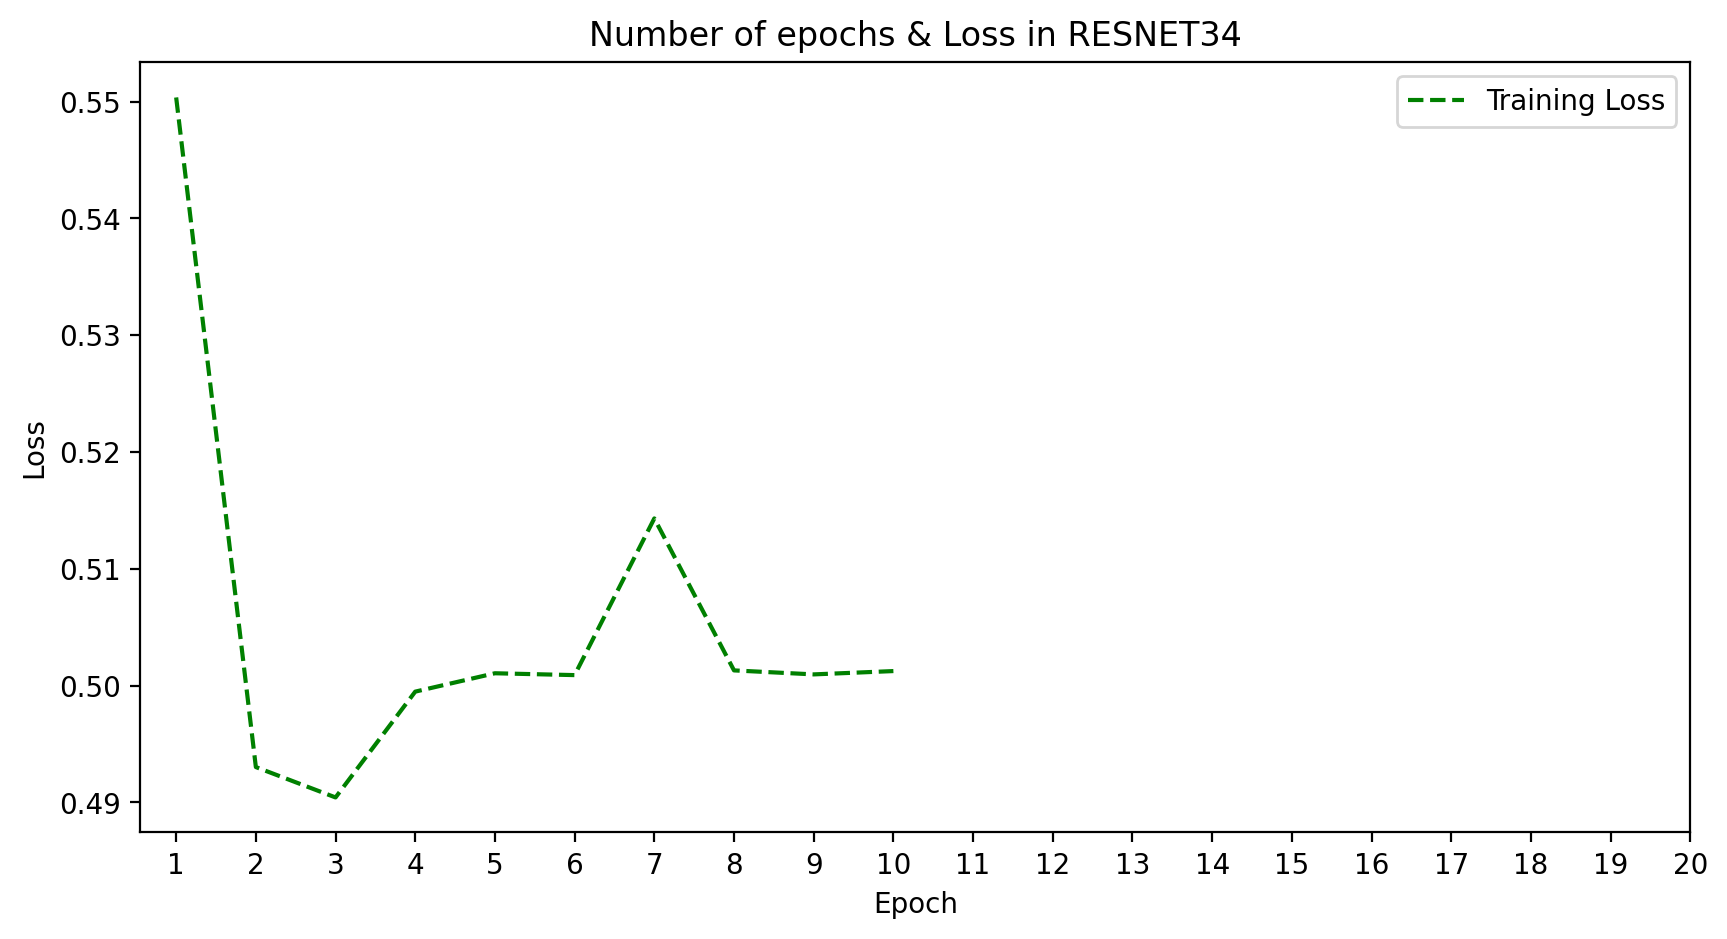

In [43]:
# Plotting the loss vs number of epochs graph
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_res, 'r--', color= 'green')
plt.legend(['Training Loss'])
plt.title('Number of epochs & Loss in RESNET34')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

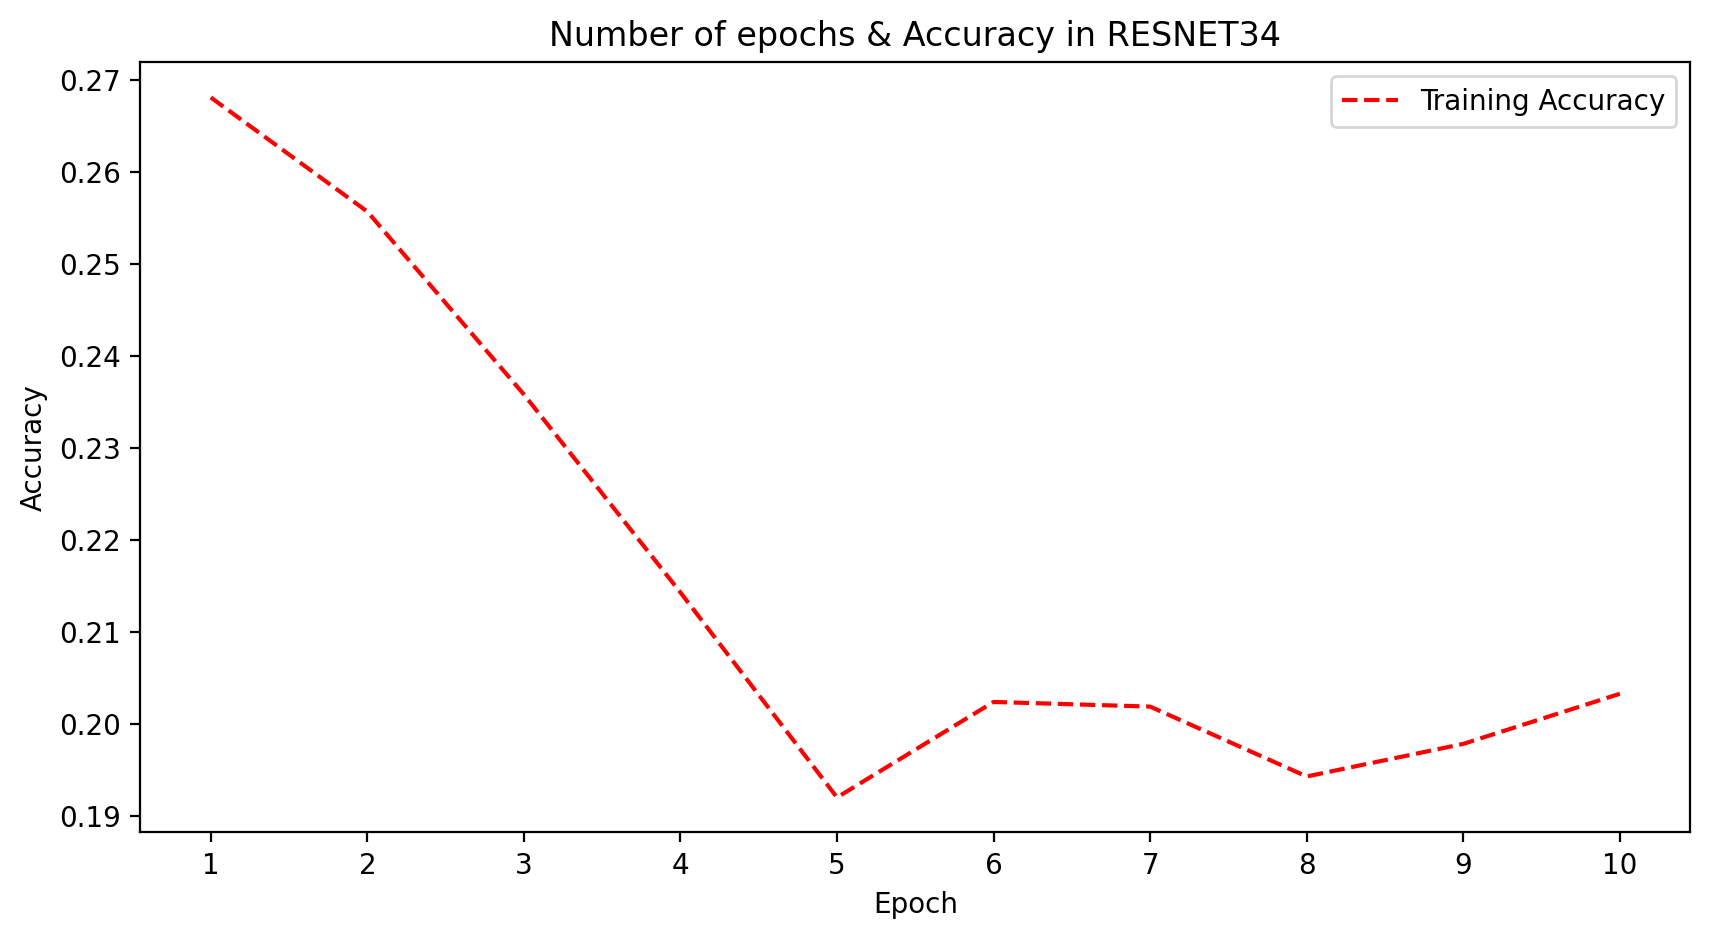

In [44]:
# Plotting the accuracy vs number of epochs graph for it
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_res, 'r--', color= 'red')
plt.legend(['Training Accuracy'])
plt.title('Number of epochs & Accuracy in RESNET34')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

<font color='Black'>**Compairing the models and Conclusions**</font>

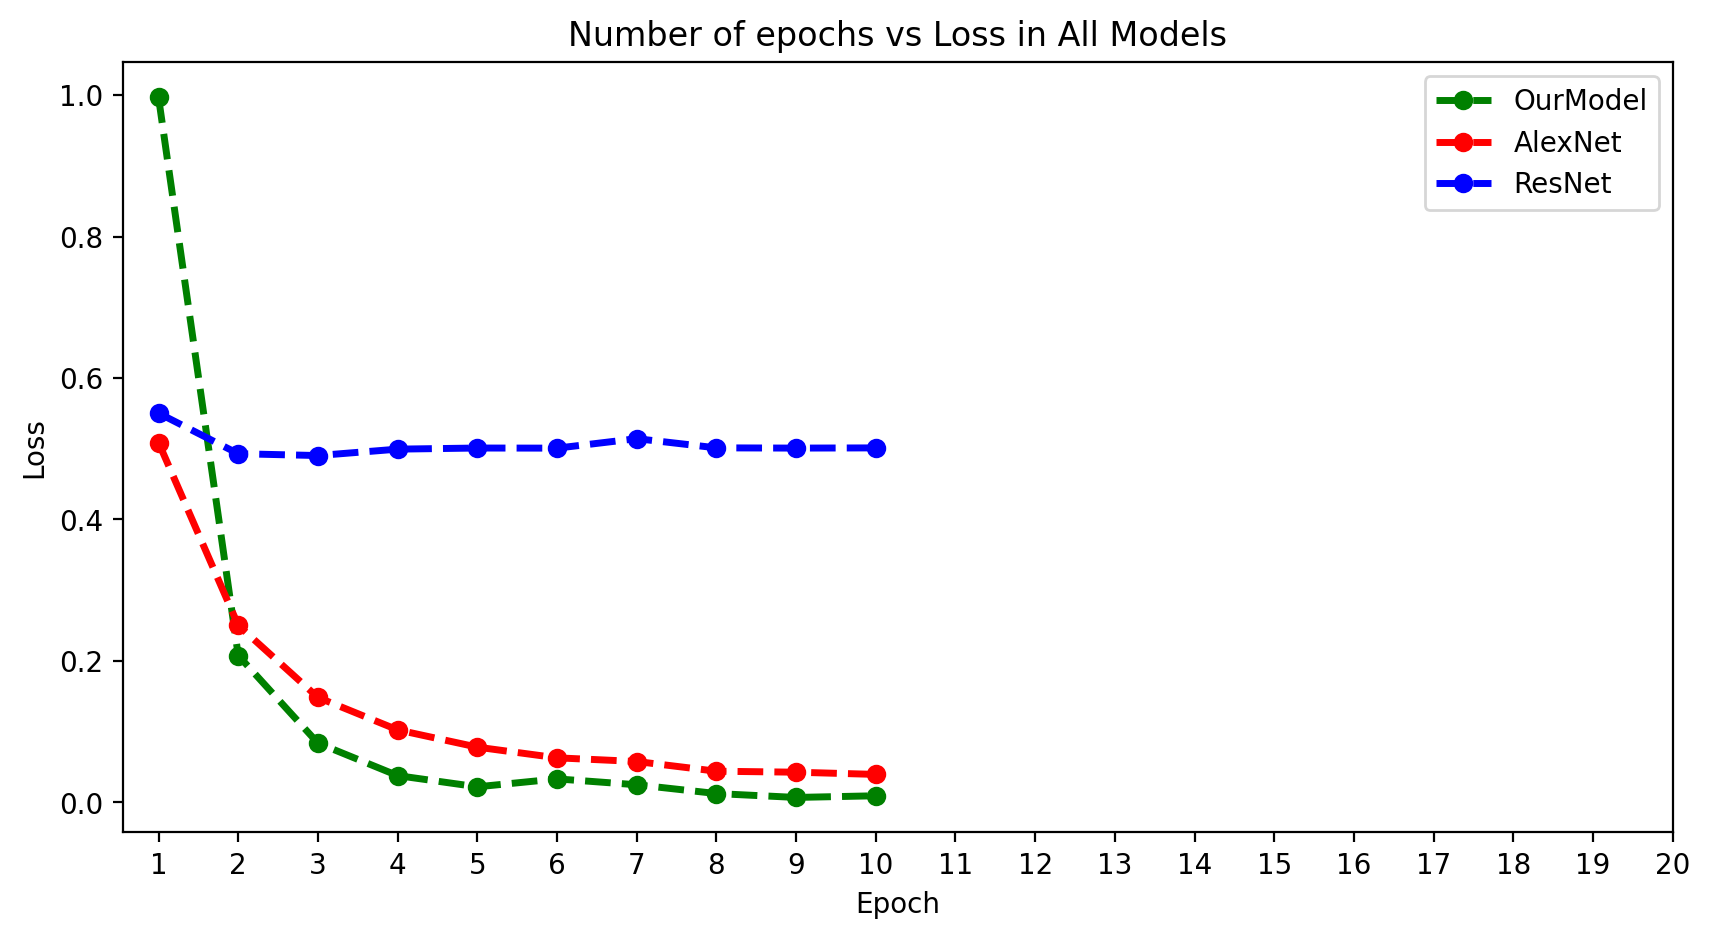

In [52]:
# Comparing the 3 models - according to the loss as epochs passes from 0-10
plt.figure(figsize=(10,5), dpi=200)

plt.plot(epoch_count, training_loss_our, '--bo',color= 'green',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, training_loss_alex, '--bo',color= 'red',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, training_loss_res, '--bo',color= 'blue',
         linewidth = '2.5', label='line with marker')
plt.legend(['OurModel', 'AlexNet','ResNet'])
plt.title('Number of epochs vs Loss in All Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

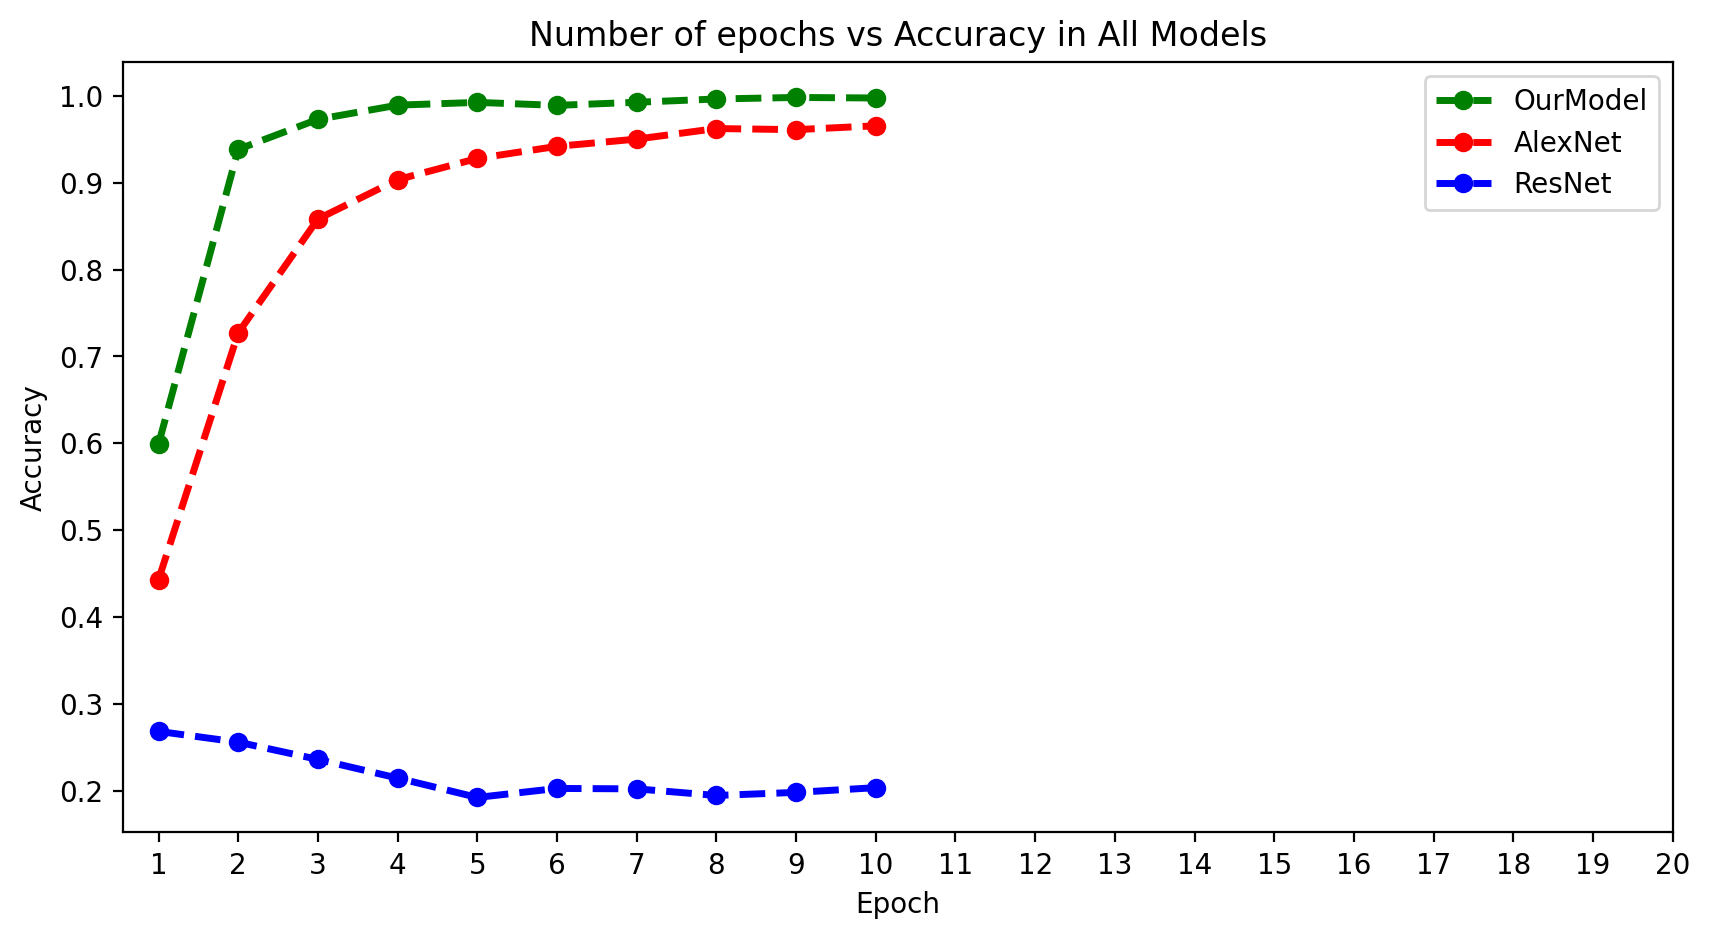

In [51]:
# Compairing the 3 models : according to the accuracy they give as epochs passes from 0-10
plt.figure(figsize=(10,5), dpi=200)

plt.plot(epoch_count, training_acc_our, '--bo',color= 'green',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, training_acc_alex, '--bo',color= 'red',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, training_acc_res, '--bo',color= 'blue',
         linewidth = '2.5', label='line with marker')
plt.legend(['OurModel', 'AlexNet','ResNet'])
plt.title('Number of epochs vs Accuracy in All Models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,21,1))
plt.show();

<font color='Black'>**Final verdict and Statements**</font>
So we clearly see our model performs the best with 99%+ accuracy and alexnet performs almost same as our model.
But suprisingly ResNet34 performs way poor with around 20% accuracy .
So why does this happen?
The most probable answer to this question is maybe the model isnt fit properly.

<img src="https://static.vecteezy.com/system/resources/thumbnails/002/016/950/original/the-end-golden-text-loop-light-glowing-effect-free-video.jpg" alt="Alt text" style="width: 400px;"/>
